# HR attrition analysis


## Importing Necessary Libraries

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__

from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
init_notebook_mode(connected = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [72]:
#import the file
df = pd.read_csv('HR.csv')

In [73]:
# shape of the data
df.shape

(1470, 35)

In [74]:
# column
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [75]:

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [76]:
# sample
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
55,33,No,Travel_Frequently,515,Research & Development,1,2,Life Sciences,1,73,...,3,80,0,15,1,3,15,14,8,12
712,33,No,Travel_Rarely,461,Research & Development,13,1,Life Sciences,1,995,...,1,80,0,5,4,3,3,2,0,2
1322,46,No,Travel_Rarely,706,Research & Development,2,2,Life Sciences,1,1857,...,3,80,1,12,4,2,9,8,4,7
503,34,No,Travel_Rarely,1397,Research & Development,1,5,Life Sciences,1,683,...,4,80,1,10,4,2,10,9,8,8
1282,33,No,Travel_Rarely,867,Research & Development,8,4,Life Sciences,1,1798,...,2,80,1,14,1,3,10,8,7,6


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Inferential Statistics

In [78]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


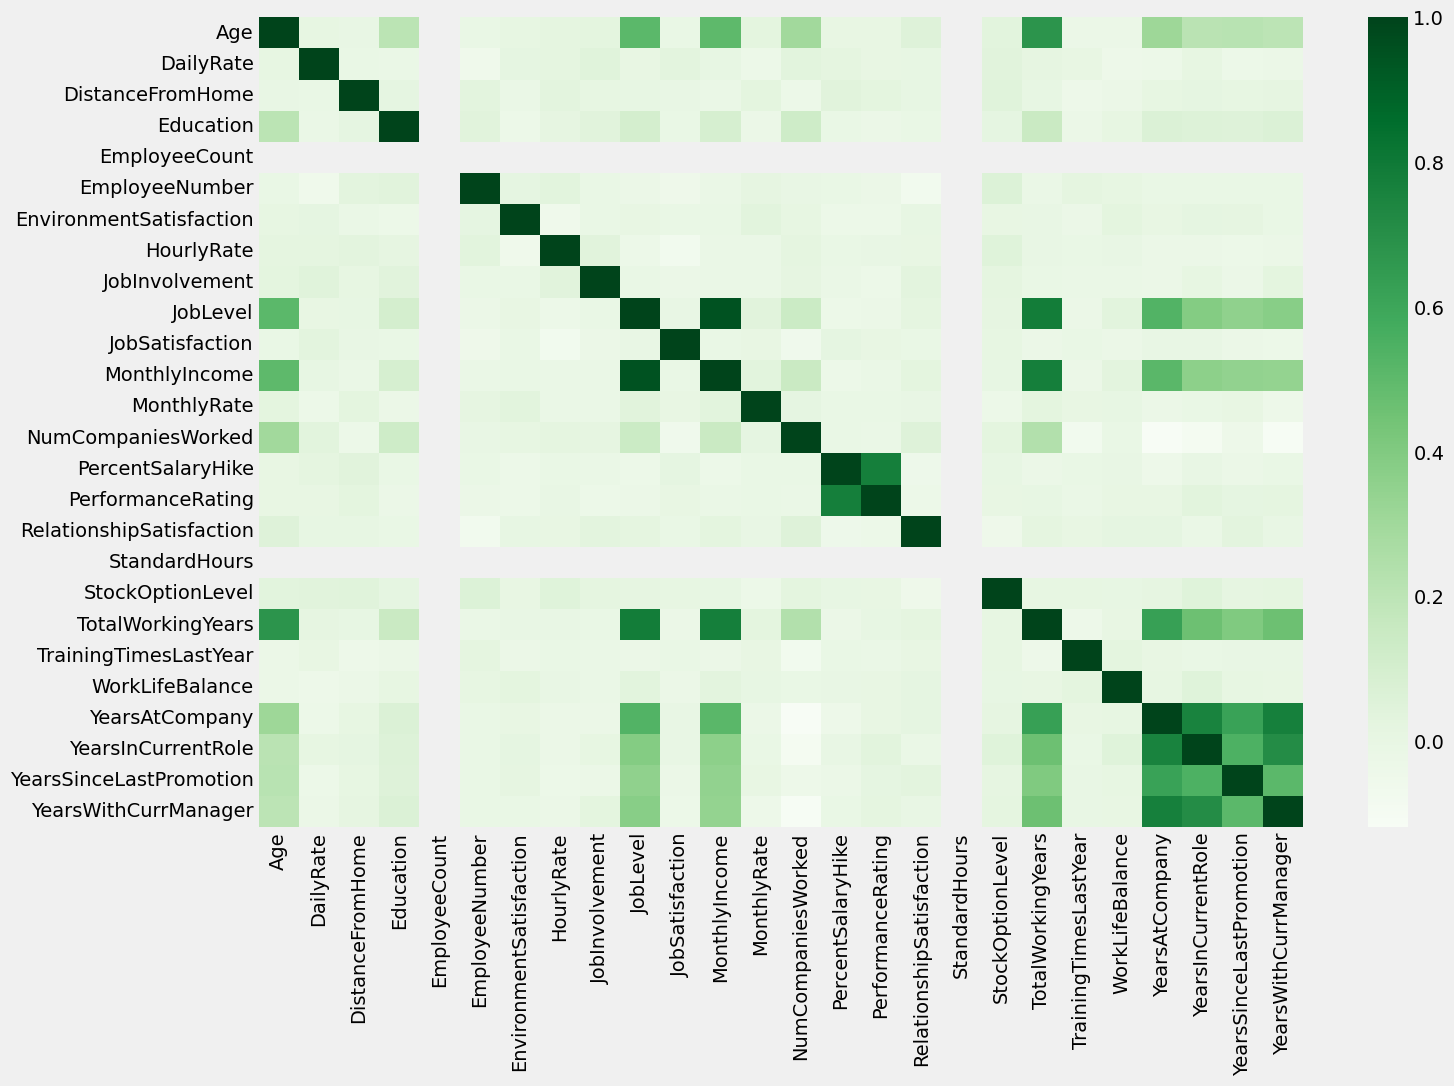

In [79]:
# correlation
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')
sns.heatmap(df.corr(), cmap = 'Greens')
plt.show()

In [80]:
# covariance
df.cov()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,83.455049,39.298434,-0.124873,1.946390,0.0,-55.797199,0.101319,4.510422,0.193841,5.153276,...,0.528776,0.0,0.291977,48.361684,-0.231093,-0.138695,17.423359,7.046750,6.373743,6.587332
DailyRate,39.298434,162819.593737,-16.308004,-6.945424,0.0,-12386.713294,8.095750,191.800350,13.246309,1.324944,...,3.423048,0.0,14.489565,45.570709,1.275892,-10.789322,-84.187085,14.520296,-43.206982,-37.957055
DistanceFromHome,-0.124873,-16.308004,65.721251,0.174705,0.0,160.649502,-0.142451,5.130567,0.050667,0.047586,...,0.057478,0.0,0.309961,0.291951,-0.386118,-0.152094,0.472219,0.553521,0.261991,0.416715
Education,1.946390,-6.945424,0.174705,1.048914,0.0,25.939251,-0.030370,0.349263,0.030927,0.115170,...,-0.010097,0.0,0.016076,1.181612,-0.033143,0.007105,0.433659,0.223515,0.179056,0.252390
EmployeeCount,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EmployeeNumber,-55.797199,-12386.713294,160.649502,25.939251,0.0,362433.299749,11.595582,430.551701,-2.950629,-12.341279,...,-45.473775,0.0,31.920482,-67.289749,18.320126,4.384426,-41.458396,-18.357800,-17.496817,-19.755358
EnvironmentSatisfaction,0.101319,8.095750,-0.142451,-0.030370,0.0,11.595582,1.194829,-1.107908,-0.006438,0.001466,...,0.009059,0.0,0.003197,-0.022905,-0.027283,0.021335,0.009761,0.071317,0.057040,-0.019496
HourlyRate,4.510422,191.800350,5.130567,0.349263,0.0,430.551701,-1.107908,413.285626,0.620006,-0.626800,...,0.029244,0.0,0.870674,-0.369139,-0.224036,-0.066170,-2.438866,-1.775575,-1.750142,-1.459700
JobInvolvement,0.193841,13.246309,0.050667,0.030927,0.0,-2.950629,-0.006438,0.620006,0.506319,-0.009948,...,0.026386,0.0,0.013049,-0.030634,-0.014071,-0.007348,-0.093097,0.022473,-0.055454,0.065951
JobLevel,5.153276,1.324944,0.047586,0.115170,0.0,-12.341279,0.001466,-0.626800,-0.009948,1.225316,...,0.025901,0.0,0.013190,6.737044,-0.025961,0.029574,3.626435,1.561913,1.262322,1.482250


# Data Analysis

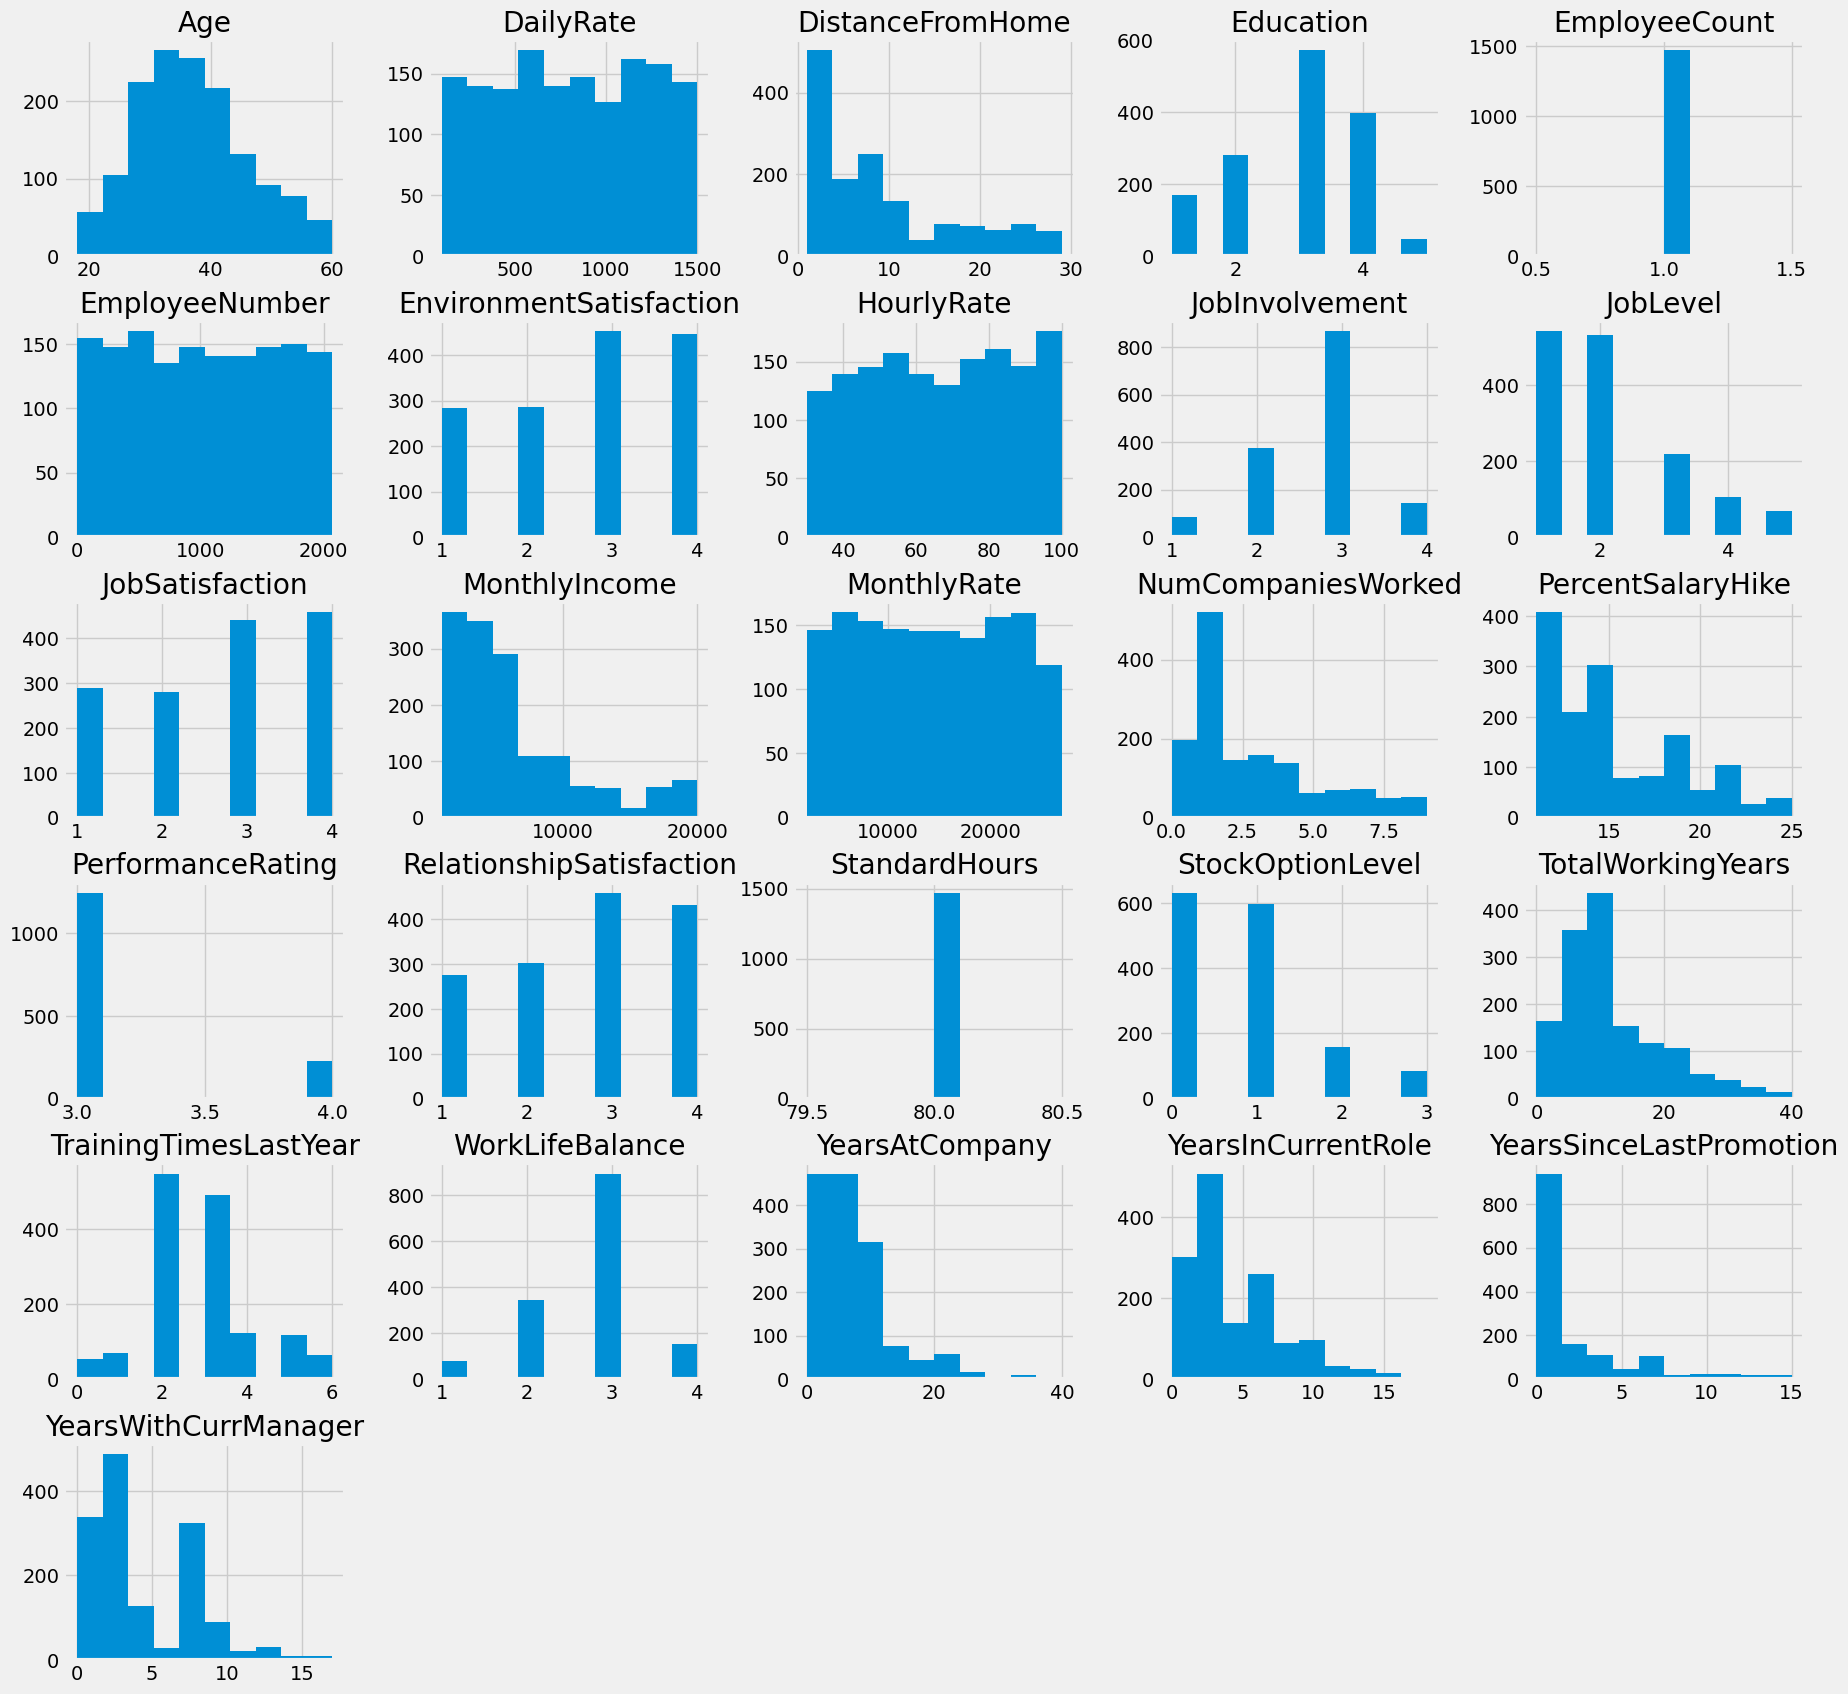

In [81]:
df.hist(figsize = (20,20))
plt.show()

In [82]:
print('Average Age of Employees who left the company : {:.2f}'.format(df[df['Attrition'] == 'Yes']['Age'].mean()))
print('Average Age of Employees who left the company : {:.2f}'.format(df[df['Attrition'] == 'No']['Age'].mean()))

Average Age of Employees who left the company : 33.61
Average Age of Employees who left the company : 37.56


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

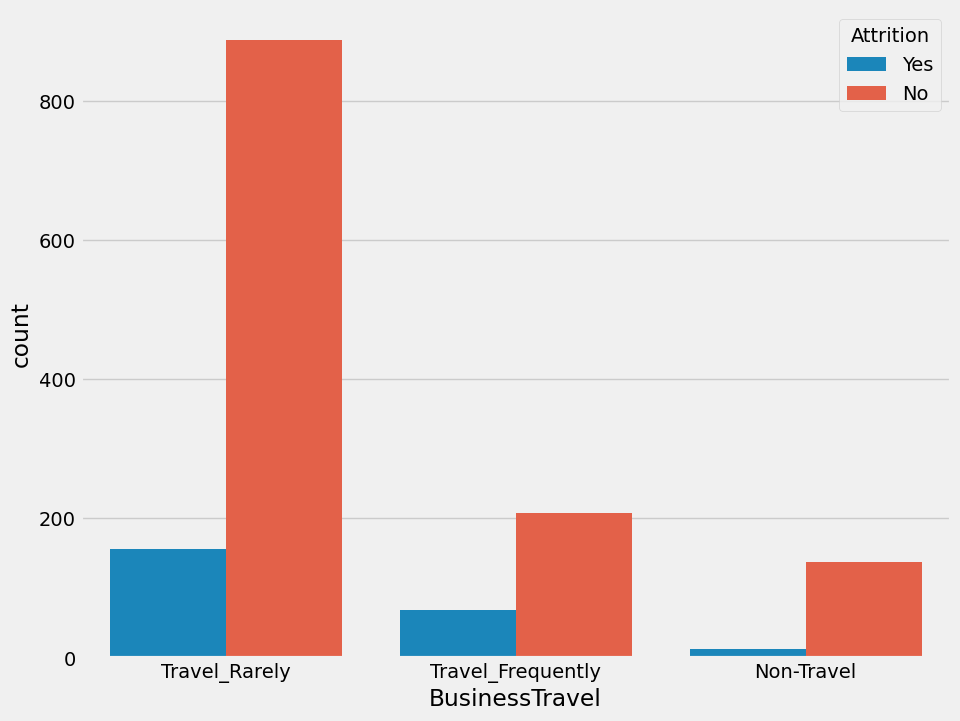

In [83]:
#BusinessTravel vs attrition
plt.figure(figsize = (10,8))
sns.countplot(x = 'BusinessTravel', hue = 'Attrition', data = df)

#### Employees who travel rarely tend to be the most who leave the company and stay in the company compared to other Business Travel criteria. But also it seems that this dataset seems to be imbalanced with more data towards Business Travel = 'Travel_Rarely'.

# Label encoding the Attrition variable

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Attrition'])
df['Attrition'] = le.transform(df['Attrition'])


In [85]:
a = []
b = [df['EducationField'].unique()]
for i in df['EducationField'].unique():
    a.append((df[(df['EducationField']==i) & (df['Attrition'] == 1)].shape[0]/df[df['EducationField']==i].shape[0])*100)
pd.DataFrame(a,b, columns = ['Attrition percentage by Education Field'])

,Attrition percentage by Education Field
Life Sciences,14.686469
Other,13.414634
Medical,13.577586
Marketing,22.012579
Technical Degree,24.242424
Human Resources,25.925926


<AxesSubplot:>

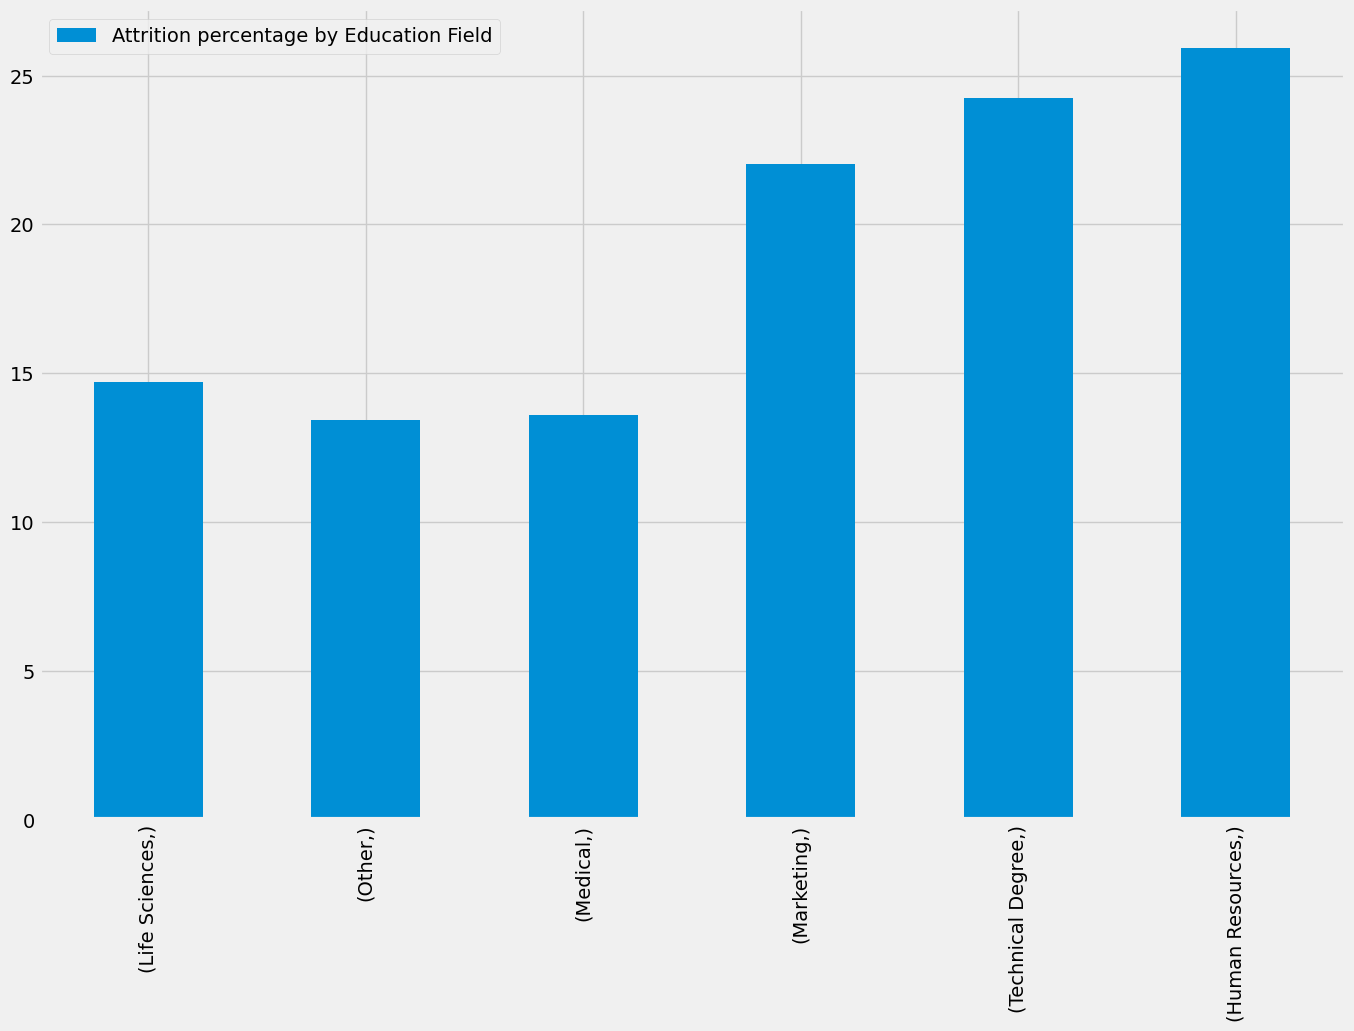

In [86]:
xticklabels = ['Life Sciences','Other','Medical','Marketing','Technical Degree','Human Resources']
pd.DataFrame(a,b, columns = ['Attrition percentage by Education Field']).plot(kind = 'bar')


#### Employees who have a work life balance = 1 tend to leave the company very soon when compared to other employees.

<AxesSubplot:ylabel='Attrition'>

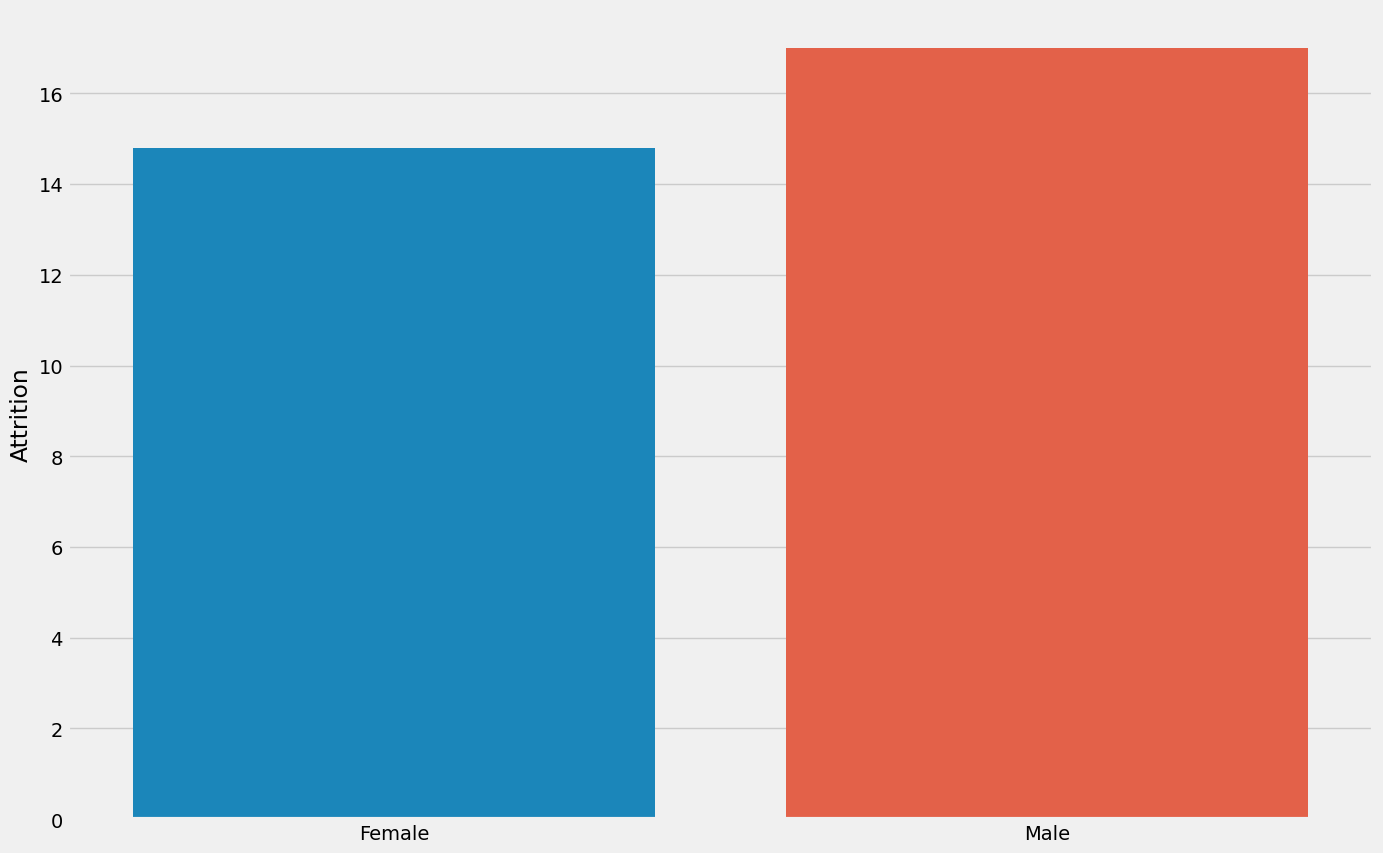

In [87]:
xticks = ['Female','Male']
abc = ((df[df['Attrition'] == 1].groupby('Gender').agg('count'))/(df.groupby('Gender').agg('count')) *100)['Attrition']
sns.barplot(xticks,abc)

#### Male has a higher proportion of Attrition than Female.

In [88]:
import plotly.express as px
df1 = df[df['Attrition'] == 1]
fig = px.histogram(df1, x= 'MonthlyIncome')
fig.show()

#### Most people having a MonthlyIncome between 2000-2999 are likely to leave the company and as the salary range increases the attrition rate decreases.

In [89]:
fig1 = px.histogram(df,x = 'HourlyRate')
fig1.show()

#### The Average Hourly rate of most of the employees is between 30-99 whereas only 19 employees get an hourly rate of 100-104.

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

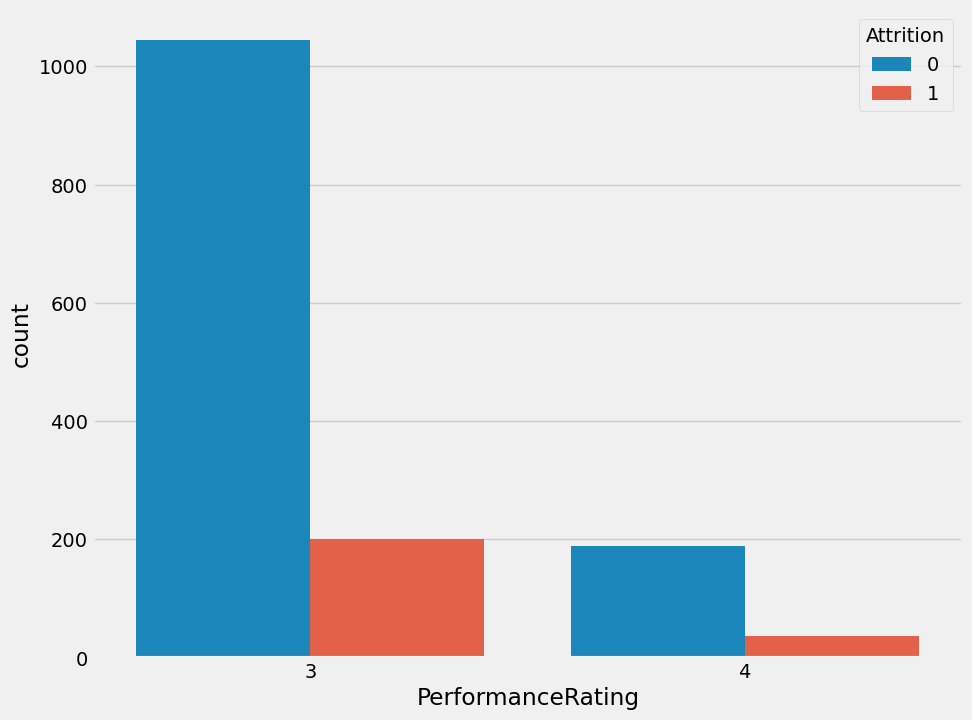

In [90]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'PerformanceRating', hue = 'Attrition', data = df)

#### Employees who have a performance rating - 3 are more likely to be leaving the company when compared to performance rating - 4.

In [91]:
df_Attr_Yes = df[df['Attrition'] == 1]
abc = df_Attr_Yes['JobSatisfaction'].value_counts()/df['JobSatisfaction'].value_counts() * 100
fig = px.bar(x = abc.index, y = abc.values)
fig.show()

#### Employees with the least JobSatisfaction = 1 has the highest possibility of leaving the company.

In [92]:
fig2 = px.histogram(df[df['Attrition'] == 1], x = 'PercentSalaryHike', color = 'Attrition')
fig2.show()

#### The histogram of the percent salary hike for the employees whose Attrition == 'Yes' is plotted above and it shows that as the percent salary hike increases the attrition count decreases. This shows that employees who are not satisfied with the salary percent hike tend to leave the company.



In [93]:
fig3 = px.pie(df[df['Attrition'] == 1],values = 'Attrition', names = 'Department',title = 'Attrition by Department')
fig3.show()

#### Attrition is mostly in the Reasearch & Development department and the least in the Human Resources department.

In [94]:
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <=2:
            print(col)

Gender
Over18
OverTime


## Label encoding the Gender and OverTime variables as they have only 2 unique values

In [95]:
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [96]:
df.drop(columns = 'Over18',inplace = True)

#### We can drop the Over18 column since it has only one unique value and won't add value to the machine learning model.

In [97]:
df = pd.get_dummies(df,drop_first = True)

#### We have one hot encoded all other 'object' variables where the unique values in the column are greater than 2.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [99]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0


In [100]:
y = df.loc[:,'Attrition']

In [101]:
X = df.drop('Attrition', axis = 1)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
print('Shape of X_train {}'.format(X_train.shape))
print('Shape of X_test {}'.format(X_test.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of X_train (1029, 47)
Shape of X_test (441, 47)
Shape of y_train (1029,)
Shape of y_test (441,)


## Model Building

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [105]:
error_rate = []
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

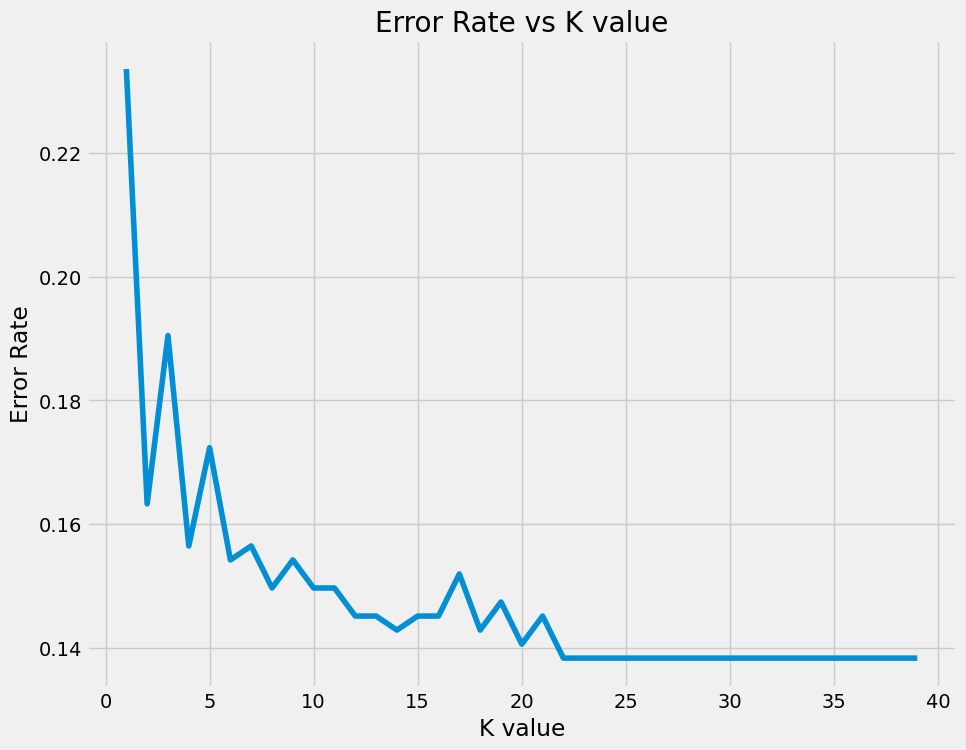

In [106]:
plt.figure(figsize = (10,8))
plt.plot(range(1,40),error_rate)
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K value')
plt.show()

In [107]:
models = [LogisticRegression(max_iter=1200000, dual = False), RandomForestClassifier(), SVC(gamma = 'auto'), DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors = 22)]
model_names = ['Logistic Regression', 'Random Forest Classifier', 'SVC','Decision Tree Classifier', 'Naive Bayes','KNeigbors Classifier']
f1_score_ = []
roc_auc = []
overall = []
for i,j in zip(model_names,models):
    clf = j
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_score_ =  f1_score(y_test,y_pred) * 100
    roc_auc = roc_auc_score(y_test,y_pred) * 100
    overall.append([i,f1_score_,roc_auc])

In [108]:
metrics = pd.DataFrame(overall, columns = ['Model Name','F1-Score','ROC AUC Score'])
metrics

,Model Name,F1-Score,ROC AUC Score
0,Logistic Regression,51.546392,69.044435
1,Random Forest Classifier,14.084507,53.440466
2,SVC,0.000000,50.000000
3,Decision Tree Classifier,33.600000,61.555220
4,Naive Bayes,40.000000,69.173857
5,KNeigbors Classifier,0.000000,50.000000


#### `Since the dataset is imbalanced we are not using the accuracy score instead F1-Score and ROC AUC Score.

In [109]:
fig = plt.figure(figsize = (10,8))
fig = px.bar(x = metrics['Model Name'], y = metrics['ROC AUC Score'])
fig.show()

<Figure size 1000x800 with 0 Axes>

#### Logistic Regression and Naive Bayes has the highest ROC AUC score so we can go for further analysis.

Fine Tuning for better accuracy of the model :

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={'C': np.arange(1e-03, 2, 0.01)}
log_GS = GridSearchCV(LogisticRegression(solver='liblinear',
                                         class_weight="balanced", 
                                         random_state=7), param_grid = grid, verbose=True,return_train_score=True,scoring = 'roc_auc', cv = 10 )
log_GS.fit(X_train,y_train)
print('Best Estimator : {}'.format(log_GS.best_estimator_))
print('Best Score : {}'.format(log_GS.best_score_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [ ]:
clf = LogisticRegression(C=1.9109999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('F1-Score',round(f1_score(y_test,y_pred)*100))
print('AUC ROC Score',round(roc_auc_score(y_test,y_pred)*100))

#### Since the dataset is imbalanced, I would be using only the AUC ROC Score for comparison with the one without fine tuning. AUC ROC Score has an increase in it when compared to that.

In [ ]:
plt.figure(figsize = (8,5))
fig = ff.create_annotated_heatmap(confusion_matrix(y_test,y_pred))
fig.show()

#### 329 out of 441 values have been predicted correctly as 0 and 1.

#### Since, Naive Bayes has no hyper-parameters to fine tune we donot use GridSearch CV for that.

# conclusion

#### Fields like Human Resources, Technical degree and Marketing has the high attrition percentage of 26%, 24% and 22%.So, the employees has to be introspected carefully to get to know their concerns.



#### Employees who have a job satisfaction = 1 has the highest attrition rate of 22.8% which needs to be addressed.



#### Research & Development department has the highest attrition percentage of 56.1%.

#### Employees who have a work life balance = 1 tend to leave the company very soon when compared to other employees.This should be considered as a benchmark and noted.